In [567]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns
import sklearn as an 


In [568]:
medical = pd.read_csv('cost_prediction.csv')
medical 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [569]:
medical.sample(6)

,age,sex,bmi,children,smoker,region,charges
348,36,female,29.920,1,no,southeast,5478.03680
316,50,male,32.205,0,no,northwest,8835.26495
1010,48,female,22.800,0,no,southwest,8269.04400
565,19,female,30.495,0,no,northwest,2128.43105
478,21,male,36.850,0,no,southeast,1534.30450
458,56,male,39.600,0,no,southwest,10601.41200


In [570]:
medical.shape

(1338, 7)

In [571]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [572]:
medical.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [573]:
medical[medical.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [574]:
medical = medical.drop_duplicates(keep='first')
medical.shape

(1337, 7)

In [575]:
medical.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\HP\AppData\Local\Temp\ipykernel_63248\3188888305.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical['age'])


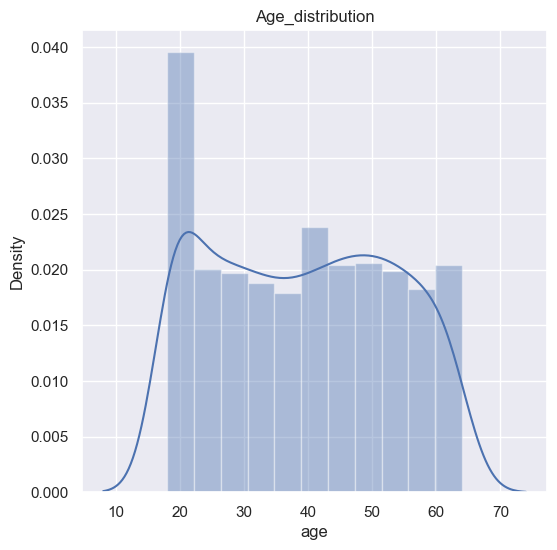

In [576]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical['age'])
plt.title('Age_distribution') 
plt.savefig('Age_distribution.jpg')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_63248\1374705347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical['bmi'])


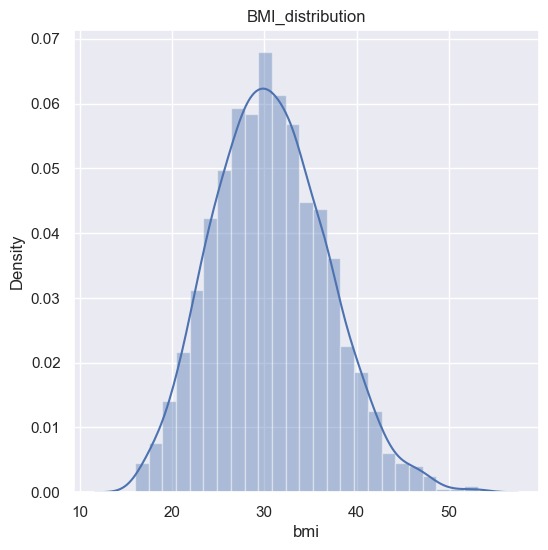

In [577]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical['bmi'])
plt.title('BMI_distribution')
plt.savefig('BMI_distribution.jpg')
plt.show()

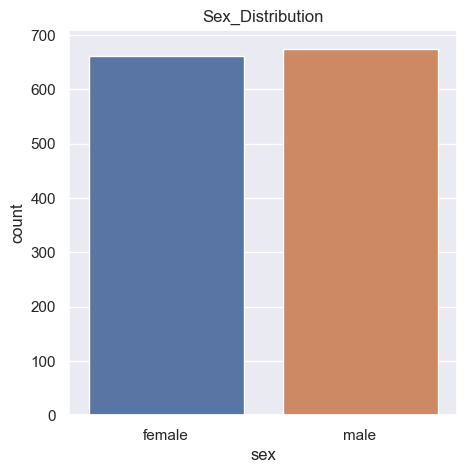

In [578]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex' , data=medical,hue='sex')
plt.title('Sex_Distribution')
plt.savefig('sex_ratio.jpg')
plt.show()

In [579]:
medical['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

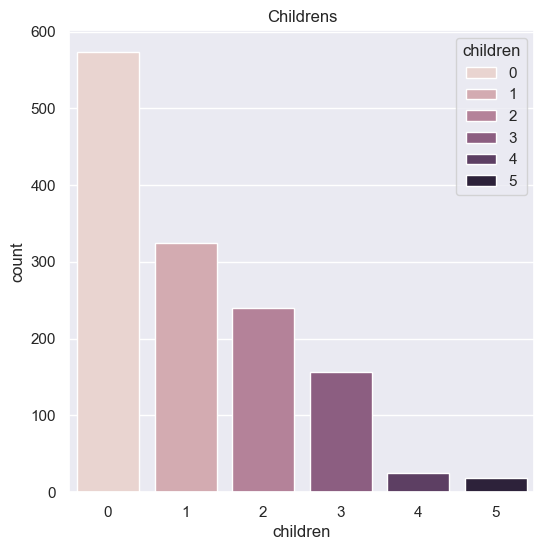

In [580]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children' , data=medical,hue='children')
plt.title('Childrens') 
plt.savefig('Childrens.jpg')
plt.show() 

In [581]:
medical['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

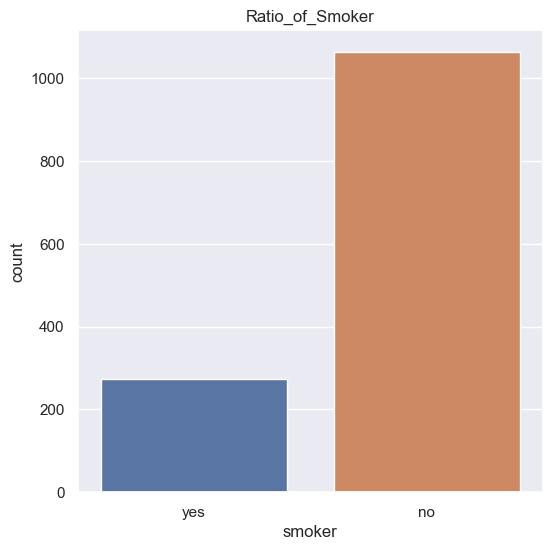

In [582]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker' , data=medical,hue='smoker')
plt.title('Ratio_of_Smoker') 
plt.savefig('Ratio_of_smoker.jpg')
plt.show()

In [583]:
medical['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

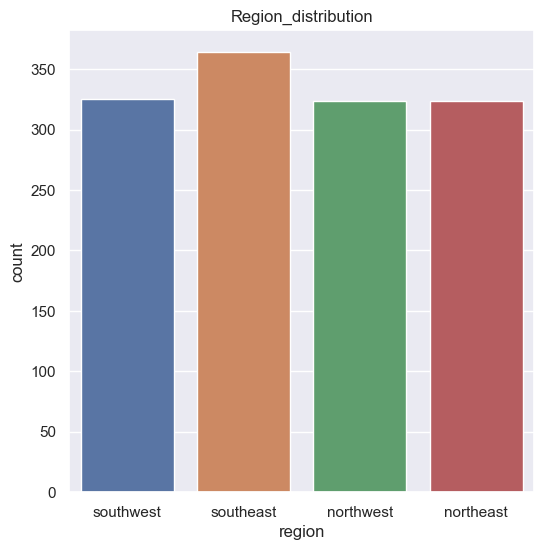

In [584]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'region' , data=medical,hue='region')
plt.title('Region_distribution')
plt.savefig('Region_distribution.jpg')
plt.show()

In [718]:
medical['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

In [719]:
# Label_Encoding --> for Convert categorical to numerical in or 1 
from sklearn.preprocessing import LabelEncoder
L1 = LabelEncoder()
L2 = LabelEncoder() 
L3 = LabelEncoder()

medical['sex'] =  L1.fit_transform(medical['sex'])
medical['smoker'] =  L2.fit_transform(medical['smoker'])
medical['region'] = L3.fit_transform(medical['region']) 
medical

C:\Users\HP\AppData\Local\Temp\ipykernel_63248\898384968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical['sex'] =  L1.fit_transform(medical['sex'])
C:\Users\HP\AppData\Local\Temp\ipykernel_63248\898384968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical['smoker'] =  L2.fit_transform(medical['smoker'])
C:\Users\HP\AppData\Local\Temp\ipykernel_63248\898384968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [720]:
medical.sample(6)

,age,sex,bmi,children,smoker,region,charges
491,61,0,25.080,0,0,2,24513.09126
1221,40,1,24.970,2,0,2,6593.50830
1273,35,1,27.610,1,0,2,4747.05290
548,25,0,28.595,0,0,0,3213.62205
981,34,1,21.375,0,0,0,4500.33925
33,63,1,28.310,0,0,1,13770.09790


In [721]:
inputs = medical.drop('charges',axis=1)
inputs
target = medical['charges'] 
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [722]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=3)

In [723]:
x_train

,age,sex,bmi,children,smoker,region
1282,18,0,21.66,0,1,0
147,51,0,37.73,1,0,2
921,62,0,33.20,0,0,3
164,37,1,29.64,0,0,1
898,18,0,40.26,0,0,2
...,...,...,...,...,...,...
790,39,0,41.80,0,0,2
256,56,1,33.63,0,1,1
969,39,0,34.32,5,0,2
953,44,1,30.20,2,1,3


In [724]:
y_train

1282    14283.4594
147      9877.6077
921     13462.5200
164      5028.1466
898      1634.5734
           ...    
790      5662.2250
256     43921.1837
969      8596.8278
953     38998.5460
1274    17043.3414
Name: charges, Length: 1069, dtype: float64

In [725]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model_reg.fit(x_train,y_train) 
score_1 = model_reg.score(x_test,y_test) 
score_1

0.7606560137229366

In [727]:
y_predict = model_reg.predict(x_test)
y_predict

array([35102.48869601,  9032.45768574,  1546.22563007, 12459.55815704,
       34776.48179965, 26359.59381837, 35892.63350845, 15833.62940125,
       34011.51130255, 11421.13523819,  3802.48616359, 11865.91016894,
       12123.1507361 , 11785.201568  , 32210.78207427, 16313.74209375,
       12515.71904817,  2266.88298332, 16933.43186369, 16126.27127989,
       11505.42079844,  4514.10678829, 12443.85897401, 12303.64037889,
       23419.17299798, 36501.95892091,  5446.66383043, 27548.29256462,
        5175.09528318,  4014.43247268,   513.69541521, 35014.43601013,
       37524.6160971 , 11400.75877195,  1637.15688729, 26362.33420256,
        8183.71910239,  8111.02702213,  6050.46897011,  3692.23865128,
        3839.55971082, 15373.76761335, 14454.07741428, 14387.77535996,
        2475.45702698,  3130.5606094 , 10321.85393584,  8864.09132163,
        4820.76406988,  6463.41295844,  6587.01811182, 31789.87383609,
        2251.41362111,  9797.11297987, 27509.05718866,  5105.42368751,
      

In [728]:
cofficient = model_reg.coef_
cofficient 



array([  260.48952177,  -240.47988891,   328.05788482,   464.94225321,
       24234.96413859,  -385.97910087])

In [686]:
intercept = model_reg.intercept_
intercept


-11726.010852193363

In [687]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(drop='first', sparse_output=False)
for_ohe = inputs[['sex', 'smoker', 'region']]
ohe_data = ohe.fit_transform(for_ohe) 
df1 = pd.DataFrame(ohe_data,columns=ohe.get_feature_names_out(for_ohe.columns)) 

df2 = inputs.drop(['sex','smoker','region'],axis=1)
inputss = pd.concat([df2,df1],axis=1)
inputss
df = inputss.dropna()
df

,age,bmi,children,sex_1,smoker_1,region_1,region_2,region_3
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1332,52.0,44.700,3.0,1.0,0.0,1.0,0.0,0.0
1333,50.0,30.970,3.0,0.0,0.0,0.0,0.0,0.0
1334,18.0,31.920,0.0,0.0,0.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,0.0,0.0,0.0,0.0,1.0


In [688]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled

y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_scaled = scaler.fit_transform(y_test_reshaped) 

y_predict_reshaped = y_predict.reshape(-1,1)
y_predict_scaled = scaler.fit_transform(y_predict_reshaped)
y_predict_scaled

array([[-7.39341854e-01],
       [-3.34451134e-01],
       [-1.81306794e-01],
       [ 1.19627338e+00],
       [-5.78135581e-01],
       [-1.17473365e+00],
       [-1.05511794e+00],
       [-1.34270964e+00],
       [-1.03782251e+00],
       [ 1.07212276e-01],
       [-3.07459767e-01],
       [ 1.26383233e+00],
       [ 9.28597752e-02],
       [-3.43924285e-01],
       [-7.18075662e-01],
       [-2.97159256e-01],
       [-6.65775414e-01],
       [-6.70216407e-01],
       [-8.00074852e-01],
       [ 1.42811131e-01],
       [-9.81371087e-01],
       [-9.39077624e-02],
       [-1.03981592e+00],
       [-8.28548646e-01],
       [-8.40434954e-01],
       [-3.95731554e-01],
       [-1.08627363e+00],
       [-6.79792791e-02],
       [-8.46923787e-01],
       [ 1.54552150e+00],
       [-3.85583672e-01],
       [ 2.37523729e+00],
       [-4.38076806e-01],
       [-2.64118900e-02],
       [ 1.12064188e+00],
       [ 2.34052072e-01],
       [-7.85998837e-02],
       [ 1.58697807e+00],
       [-5.9

In [751]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 50,max_iter=100,tol=0.1)
lasso_reg1 = Lasso(alpha= 50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)


0.7623496195785905

In [752]:
# L2 Regressioin 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
ridge_reg.score(x_test,y_test)

0.7483169479769061

In [753]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1) 
ridge_reg1 = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
ridge_reg.score(x_test,y_test) 

ridge_reg1.fit(x_train_scaled,y_train)
ridge_reg1.score(x_test_scaled,y_test)


0.7618962368079745

In [754]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
model_tree.score(x_test,y_test)

0.7568346937832571

In [755]:
from sklearn import tree 
model_tree1 = tree.DecisionTreeRegressor()
model_tree1.fit(x_train_scaled,y_train_scaled)

model_tree1.score(x_test_scaled,y_test_scaled)

0.7774333186430353

In [756]:
from sklearn.svm import SVR
model_svr1 = SVR(C=10)
model_svr1.fit(x_train_scaled,y_train_scaled) 
model_svr1.score(x_test_scaled,y_test_scaled)



d:\coding notes\jupyter project\myenv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8588710946381966

In [757]:
from sklearn.ensemble import RandomForestRegressor
model_Ran = RandomForestRegressor()
model_Ran.fit(x_train,y_train)
model_Ran.score(x_test,y_test)


0.856051339802619

In [758]:
from sklearn.ensemble import RandomForestRegressor
model_Ran1 = RandomForestRegressor()
model_Ran1.fit(x_train_scaled,y_train)
model_Ran1.score(x_test_scaled,y_test)



0.8609428250660651

In [748]:

data2 = {'Contentants': ['cofficient1','cofficient2','cofficient3','cofficient4','cofficient5','cofficient6','Intercetpt'],
         'Values': ['260.48952177','-240.47988891','328.05788482','464.94225321','24234.96413859','-385.97910087','-11726.010852193363']} 
df2 = pd.DataFrame(data2)
df2

,Contentants,Values
0,cofficient1,260.48952177
1,cofficient2,-240.47988891
2,cofficient3,328.05788482
3,cofficient4,464.94225321
4,cofficient5,24234.96413859
5,cofficient6,-385.97910087
6,Intercetpt,-11726.010852193363


In [759]:
data = {'Algorithm': ['Linear Rression', 'L1(Lasso)', 'L2(Ridge)','Decision Tree','SVR','Random Forest'],
        'Accuracy': [0.760, 0.761, 0.762, 0.775, 0.858, 0.860]}
df = pd.DataFrame(data)
df

,Algorithm,Accuracy
0,Linear Rression,0.760
1,L1(Lasso),0.761
2,L2(Ridge),0.762
3,Decision Tree,0.775
4,SVR,0.858
5,Random Forest,0.860


In [760]:
import pickle
pickle.dump(model_Ran1,open('model_Medical.pkl','wb')) 

